In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


In [146]:
# 🔹 Step 2: Handle Missing Data
# Some columns in the dataset may contain missing (NaN) values.
# To avoid errors in calculations and visualizations, we replace NaNs with 0.
# This ensures our data remains structured and prevents unexpected issues.
# 🔹 Handle missing data to prevent errors in analysis
# Filling NaN values with 0 ensures smooth calculations.

# Load the dataset directly from the OWID GitHub
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)


df.info()


# Fill missing values to prevent errors
df.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

##World map view


In [147]:
# 🔹 Step 4: Create a Global Map Showing COVID-19 Cases
# This visualization uses Folium to create a choropleth map.
# The map represents total cases (log-transformed) to ensure visibility across all regions.
# Darker colors indicate higher case counts, while lighter colors indicate lower counts.
# The map dynamically updates as the dataset changes.
# 🔹 Create a global map showing COVID-19 case numbers
# Using a log scale helps visualize large differences between countries.
import folium




df["total_cases"] = df["total_cases"].fillna(0)


df["log_cases"] = np.log1p(df["total_cases"])


threshold_scale = np.linspace(df["log_cases"].min(), df["log_cases"].max(), 12).tolist()


world_map = folium.Map(location=[20, 0], zoom_start=2)


folium.Choropleth(
    geo_data="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    name="choropleth",
    data=df,
    columns=["iso_code", "log_cases"],
    key_on="feature.id",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Total COVID-19 Cases (Log Scale)",
    bins=threshold_scale,
).add_to(world_map)


world_map


##Per Continent stats





Total cases

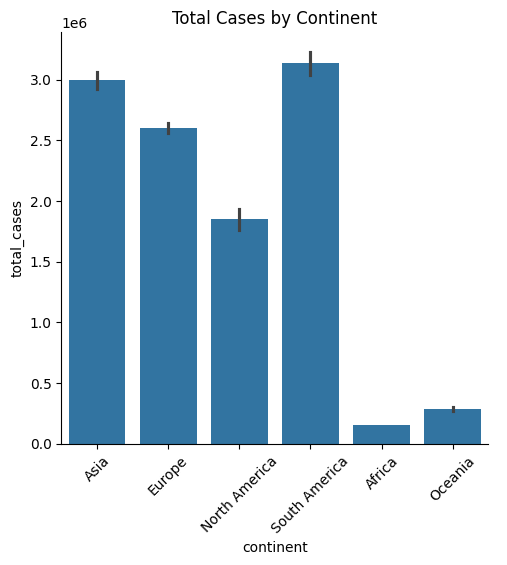

In [148]:
df.groupby('continent')['total_cases'].sum().sort_values(ascending=False)
sns.catplot(x='continent', y='total_cases', data=df, kind='bar', order=df.groupby('continent')['total_cases'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title("Total Cases by Continent")
plt.show()

male and female smokers

In [149]:
print(df.groupby('continent')['male_smokers'].sum().sort_values(ascending=False))
print(df.groupby('continent')['female_smokers'].sum().sort_values(ascending=False))

continent
Asia             2605050.0
Europe           2384358.0
Africa           1652740.2
Oceania           590707.6
North America     448215.4
South America     330391.0
Name: male_smokers, dtype: float64
continent
Europe           1567743.8
Asia              312087.7
Oceania           300419.2
South America     164786.4
Africa            155849.4
North America     150855.0
Name: female_smokers, dtype: float64


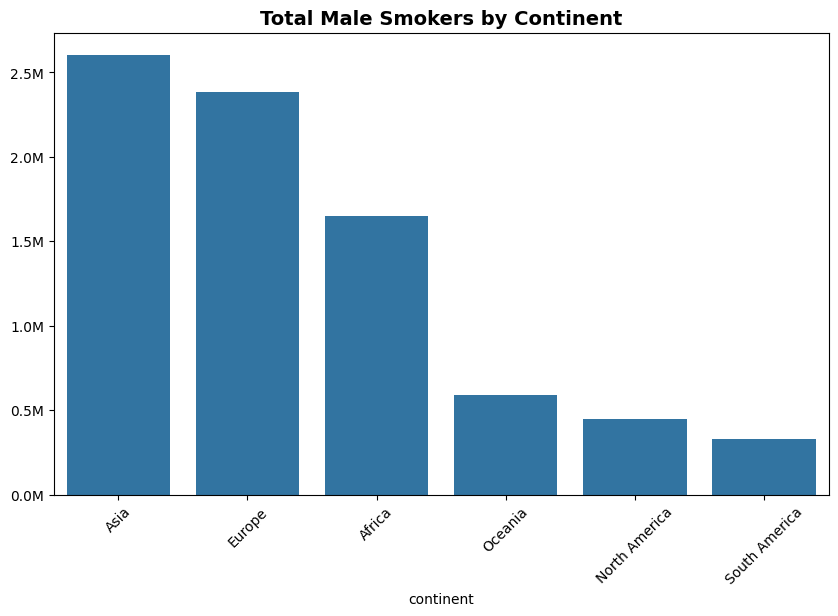

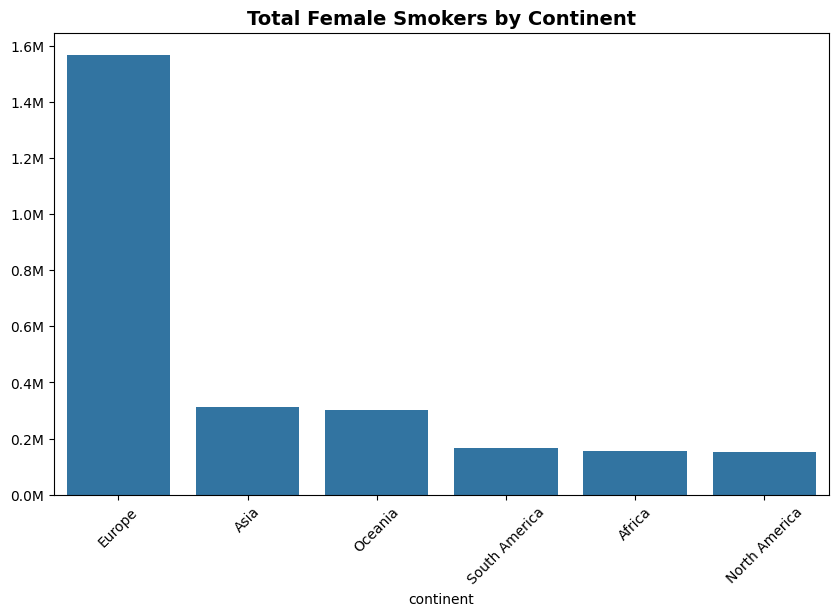

In [150]:

from matplotlib.ticker import FuncFormatter


def millions_formatter(value, _):
    return f"{value / 1e6:.1f}M"


male_smokers_by_continent = df.groupby('continent')['male_smokers'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=male_smokers_by_continent.index, y=male_smokers_by_continent.values)

plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


plt.title("Total Male Smokers by Continent", fontsize=14, fontweight='bold')

plt.show()


female_smokers_by_continent = df.groupby('continent')['female_smokers'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=female_smokers_by_continent.index, y=female_smokers_by_continent.values)

plt.xticks(rotation=45)


ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


plt.title("Total Female Smokers by Continent", fontsize=14, fontweight='bold')

plt.show()


total deaths

In [151]:
total_deaths_by_continent = df.groupby('continent')['total_deaths'].sum().sort_values(ascending=False)

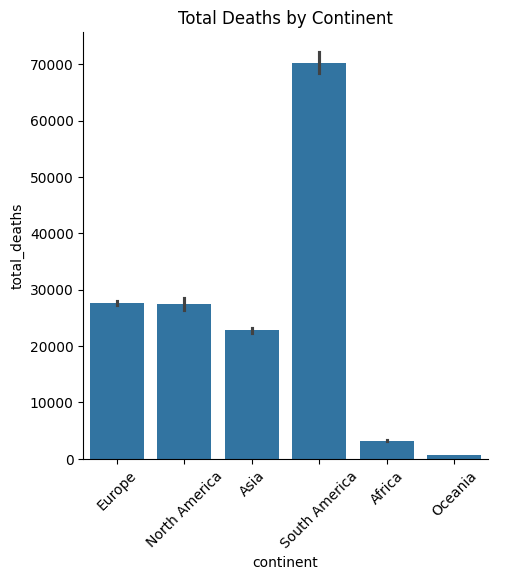

In [152]:
sns.catplot(x='continent', y='total_deaths', data=df, kind='bar', order=total_deaths_by_continent.index)
plt.xticks(rotation=45)
plt.title("Total Deaths by Continent")
plt.show()

vaccination rates

Text(0, 0.5, 'Number of People')

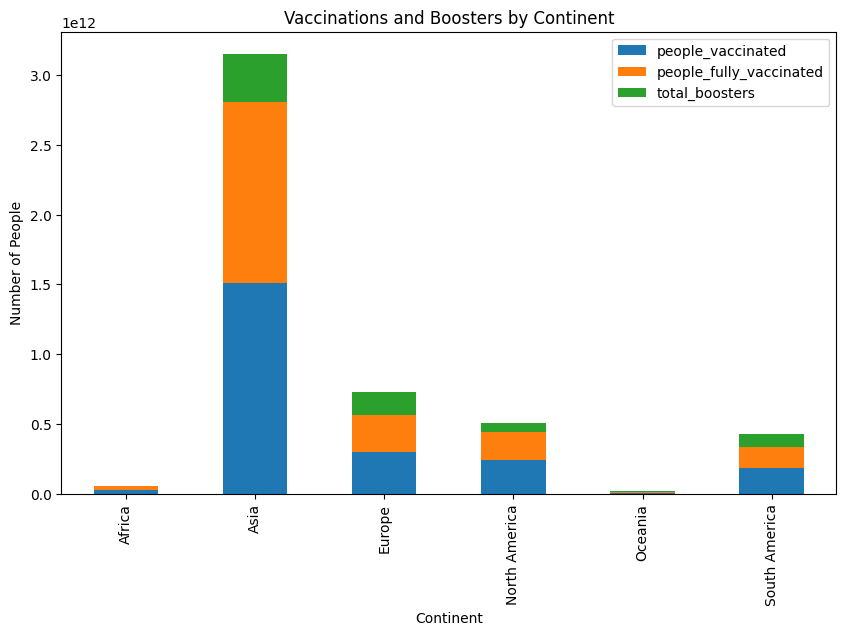

In [153]:
#create a stacked bar chart of vaccinations and boosters
vaccinations_by_continent = df.groupby('continent')[['people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].sum()
vaccinations_by_continent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Vaccinations and Boosters by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of People")



##By Location

total cases

In [154]:
df.groupby('location')['total_cases'].sum().sort_values(ascending=False).head(25)

,total_cases
location,
World,7.156972e+11
High-income countries,3.935628e+11
Asia,2.521673e+11
Europe,2.367567e+11
Upper-middle-income countries,2.180374e+11
European Union (27),1.713306e+11
North America,1.270737e+11
United States,1.059145e+11
Lower-middle-income countries,1.008731e+11


total deaths

In [155]:
location_total_deaths = df.groupby('location')['total_deaths'].sum().sort_values(ascending=False).head(25)
print(location_total_deaths)

location
World                            8.009961e+09
High-income countries            3.303895e+09
Upper-middle-income countries    3.265565e+09
Europe                           2.361106e+09
North America                    1.880636e+09
Asia                             1.790405e+09
South America                    1.646924e+09
European Union (27)              1.427055e+09
Lower-middle-income countries    1.385814e+09
United States                    1.302221e+09
Brazil                           8.455335e+08
India                            6.366561e+08
Russia                           4.301027e+08
Mexico                           4.212741e+08
Africa                           3.069558e+08
Peru                             2.831378e+08
United Kingdom                   2.776032e+08
Italy                            2.267819e+08
France                           1.975228e+08
Germany                          1.903918e+08
Indonesia                        1.830357e+08
Iran                     

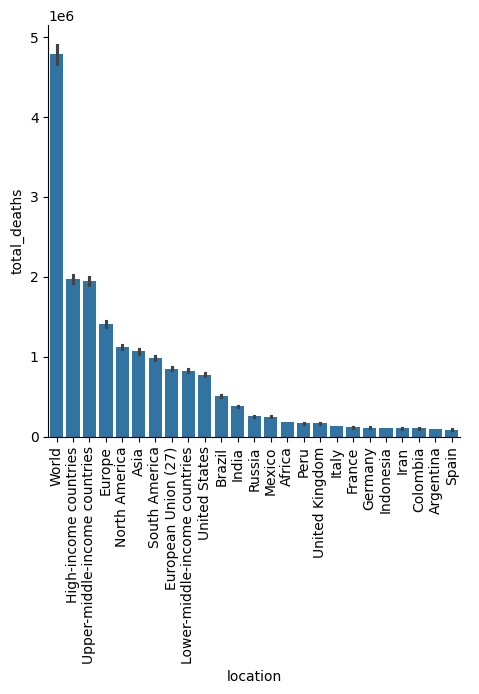

In [156]:
sns.catplot(x='location', y='total_deaths', data=df, kind='bar', order=location_total_deaths.index)
plt.xticks(rotation=90)
plt.show()

smokers

In [157]:
male_smokers_bylocation = df.groupby('location')['male_smokers'].sum().sort_values(ascending=False).head(25)
female_smokers_bylocation = df.groupby('location')['female_smokers'].sum().sort_values(ascending=False).head(25)

print(male_smokers_bylocation)
print(female_smokers_bylocation)

location
East Timor                209932.8
Indonesia                 127391.4
Tunisia                   110149.2
Kiribati                   98598.6
Russia                     97594.2
Georgia                    92907.0
Maldives                   92070.0
Lesotho                    90228.6
Cuba                       89224.2
Cyprus                     88219.8
Congo                      87550.2
Armenia                    87215.4
Greece                     87048.0
Laos                       85708.8
Albania                    85708.8
Latvia                     85374.0
Kyrgyzstan                 84537.0
Egypt                      83867.4
Papua New Guinea           81691.2
China                      81021.6
Montenegro                 80184.6
Bosnia and Herzegovina     79849.8
Ukraine                    79347.6
Morocco                    78845.4
Mongolia                   77841.0
Name: male_smokers, dtype: float64
location
Montenegro                73656.0
Nauru                     71982.0
Serb

vaccination rates

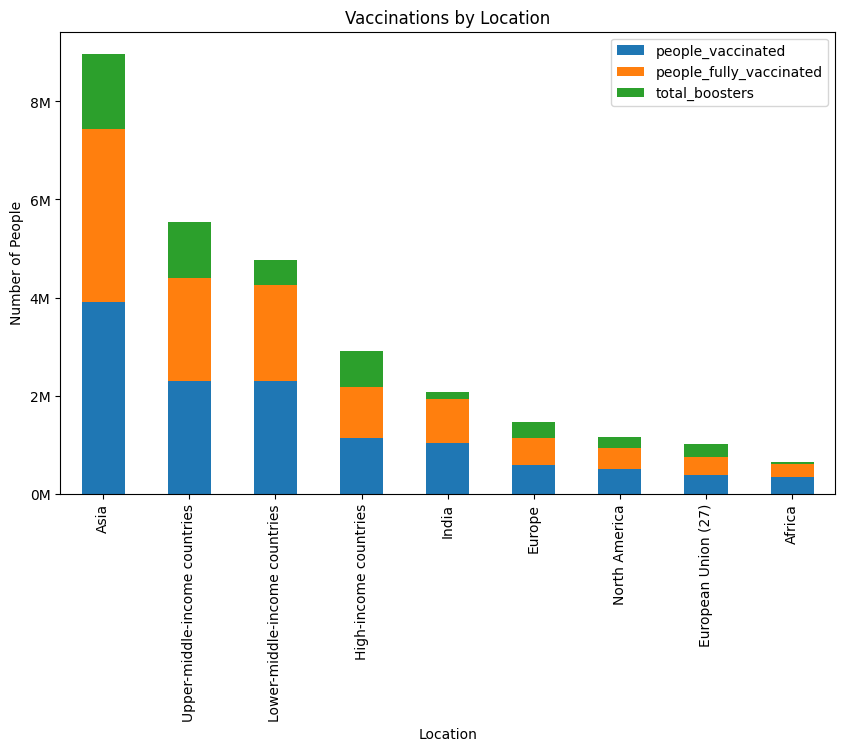

In [158]:
#create a stacked bar chart for vaccinations by location

vaccinations_by_location = df.groupby('location')[['people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].sum().nlargest(10, columns = ['people_vaccinated', 'people_fully_vaccinated', 'total_boosters']).iloc[1:]
vaccinations_by_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Vaccinations by Location")
plt.xlabel("Location")
plt.ylabel("Number of People")


def millions_formatter(x, pos):
    return f'{x / 1e12:.0f}M'


ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))


plt.show()

##Case Fatality rates

In [159]:
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
df['case_fatality_rate']

,case_fatality_rate
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
429430,2.154768
429431,2.154768
429432,2.154768
429433,2.154768


By continent and location.

In [160]:
fatality_continent = df.groupby('continent')['case_fatality_rate'].mean().sort_values(ascending=False)

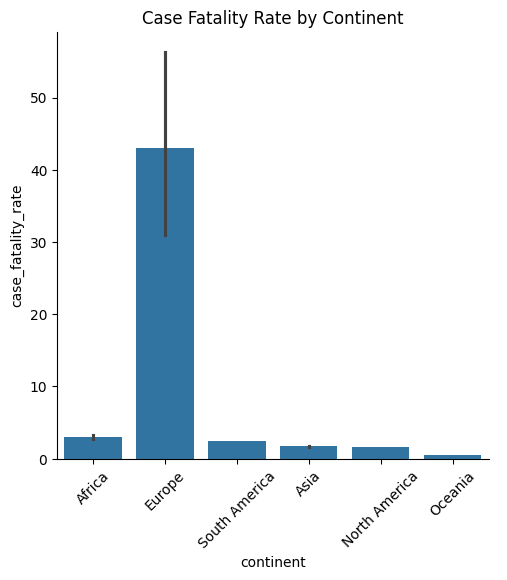

In [161]:
sns.catplot(x='continent', y='case_fatality_rate', data=df, kind='bar', order=fatality_continent.index)
plt.xticks(rotation=45)
plt.title("Case Fatality Rate by Continent")
plt.show()

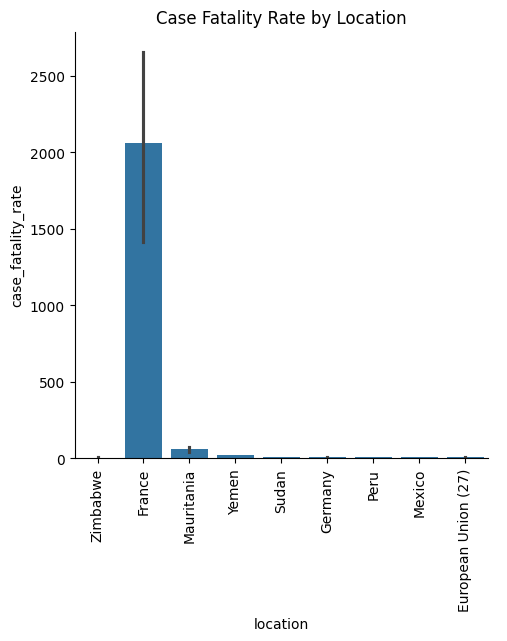

In [162]:
fatality_location = df.groupby('location')['case_fatality_rate'].mean().nlargest(10).iloc[1:]
sns.catplot(x='location', y='case_fatality_rate', data=df, kind='bar', order=fatality_location.index)
plt.xticks(rotation=90)
plt.title("Case Fatality Rate by Location")
plt.show()

##positivity rates

by continent

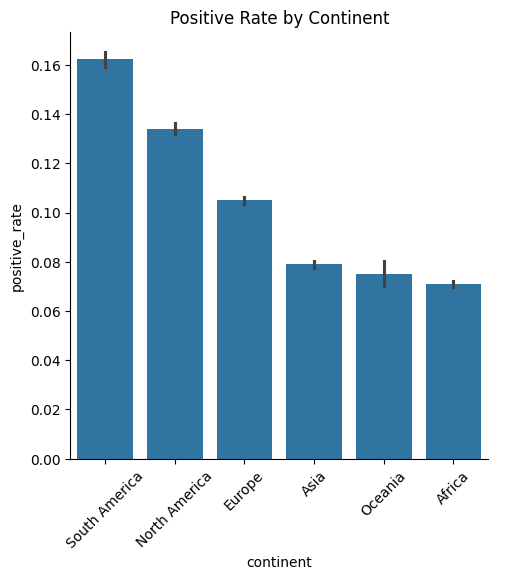

In [163]:
continent_positivity_rate = df.groupby('continent')['positive_rate'].mean().sort_values(ascending=False)
continent_positivity_rate
sns.catplot(x='continent', y='positive_rate', data=df, kind='bar', order=continent_positivity_rate.index)
plt.xticks(rotation=45)
plt.title("Positive Rate by Continent")
plt.show()

by location

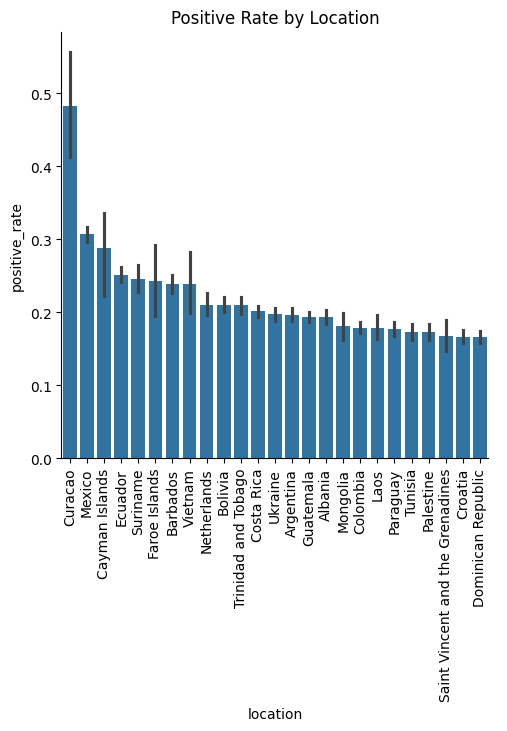

In [164]:
location_positivity_rate = df.groupby('location')['positive_rate'].mean().sort_values(ascending=False).head(25)
location_positivity_rate
sns.catplot(x='location', y='positive_rate', data=df, kind='bar', order=location_positivity_rate.index)
plt.xticks(rotation=90)
plt.title("Positive Rate by Location")
plt.show()

##Correlation Plots

smoking vs deaths

In [165]:


df['total_smokers'] = df['male_smokers'] + df['female_smokers']
total_smokers = df['total_smokers'].sum().round(0)
total_smokers



total_deaths = df['total_deaths'].sum().round(0)
total_deaths

print(total_deaths)
print(total_smokers)

33463017726.0
10720981.0


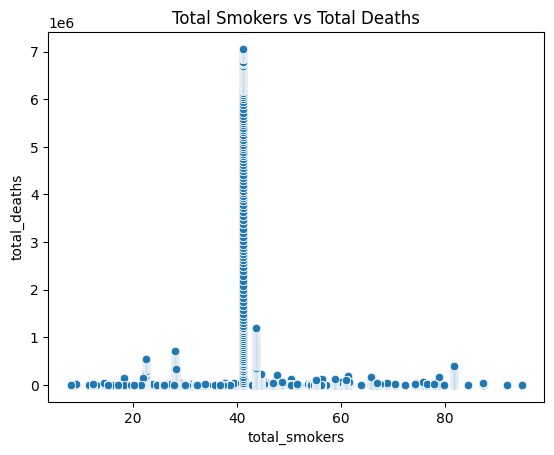

In [166]:

sns.scatterplot(x='total_smokers', y='total_deaths', data=df)
plt.title('Total Smokers vs Total Deaths')
plt.show()

gdp factors

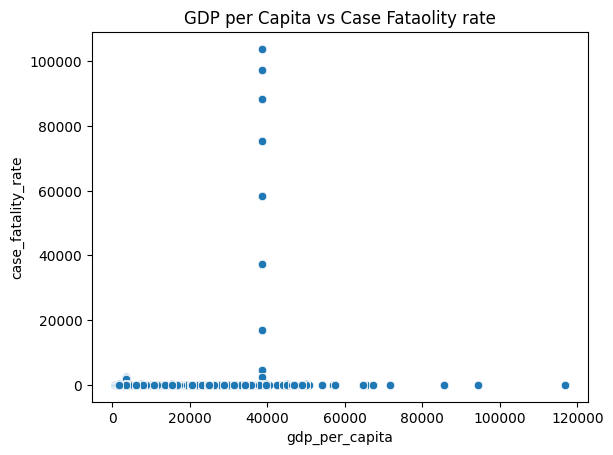

In [167]:
sns.scatterplot(x='gdp_per_capita', y='case_fatality_rate', data=df)
plt.title('GDP per Capita vs Case Fataolity rate')
plt.show()

testing efficiency

Text(0.5, 1.0, 'Tests per Case vs Positive Rate Correlation')

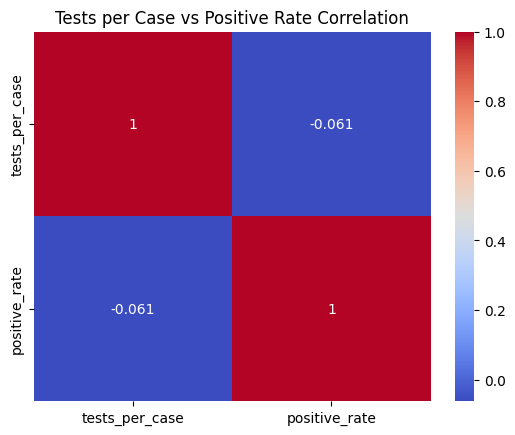

In [168]:
sns.heatmap(df[['tests_per_case', 'positive_rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Tests per Case vs Positive Rate Correlation')

stringency index vs covid cases

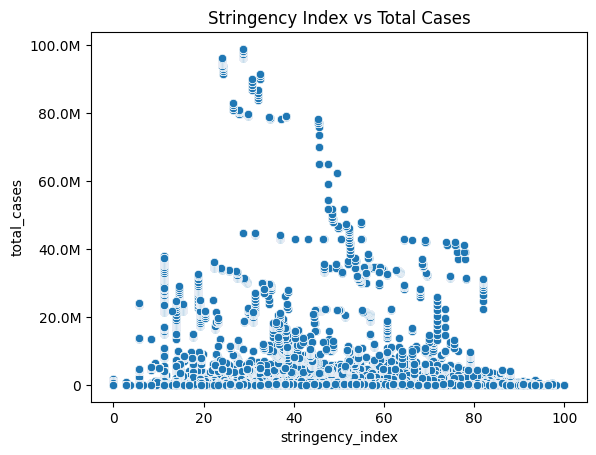

In [169]:
#stringency index vs total cases
sns.scatterplot(x='stringency_index', y='total_cases', data=df)
plt.title('Stringency Index vs Total Cases')

def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    else:
        return f'{x:.0f}'


ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))


plt.show()


##Time Series

total cases

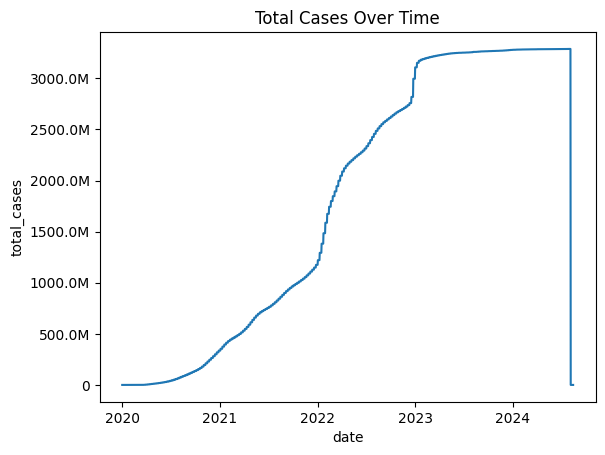

In [170]:
#line charts of cases over times
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')

sns.lineplot(data=df.groupby('date')['total_cases'].sum())
plt.title('Total Cases Over Time')

def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    else:
        return f'{x:.0f}'


ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

case fatality rate

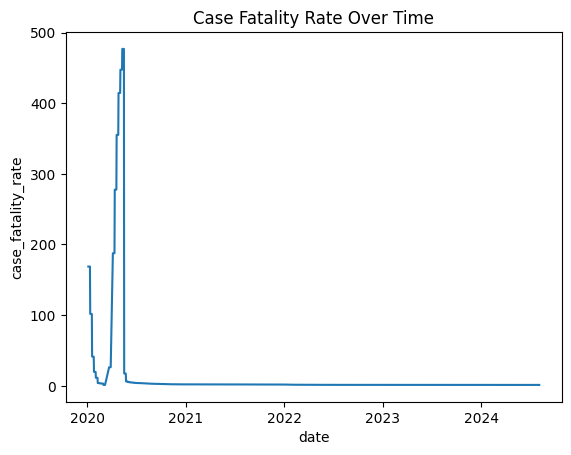

In [174]:
#line chart for case fatality rate
sns.lineplot(data=df.groupby('date')['case_fatality_rate'].mean())
plt.title('Case Fatality Rate Over Time')

def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    else:
        return f'{x:.0f}'


ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.show()

cases vs vaccination rates

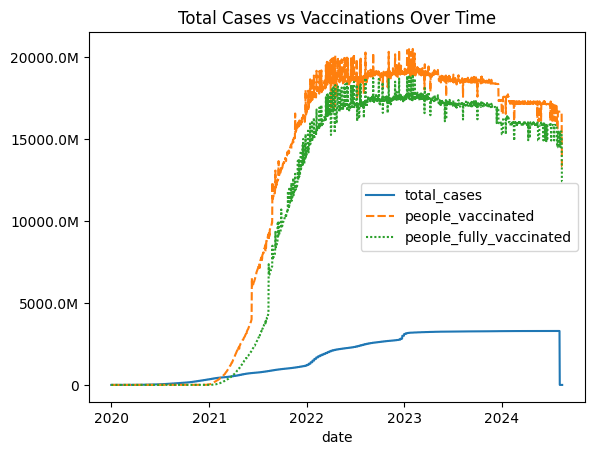

In [175]:
#cases vs vaccinations overtime. time series
sns.lineplot(data=df.groupby('date')[['total_cases', 'people_vaccinated', 'people_fully_vaccinated']].sum())
plt.title('Total Cases vs Vaccinations Over Time')

def millions_formatter(x, pos):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    else:
        return f'{x:.0f}'


ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))


plt.show()
